In [47]:
# CS 451/551
# Coding Practice Session 5
# Last name: Guthrie
# Email: mbguthrie1@crimson.ua.edu
# Q1
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

X = iris.data
y = iris.target
features = iris.feature_names
targets = iris.target_names

print(f"Shape: {X.shape}")
print(f"Feature names: {features}")
print(f"Target names: {targets}")

df_features = pd.DataFrame(X, columns=iris.feature_names)
print(df_features.head(12).to_string())

Shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5        

Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)


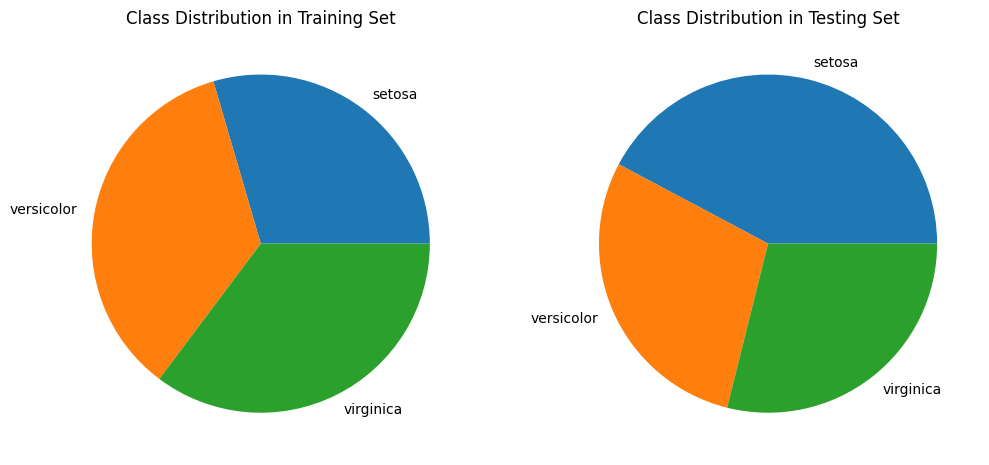

In [48]:
# Q2
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

train_class_counts = np.bincount(y_train)
test_class_counts = np.bincount(y_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Training Set
plt.subplot(1, 2, 1)
plt.pie(train_class_counts, labels=targets)
plt.title('Class Distribution in Training Set')

plt.subplot(1, 2, 2)
plt.pie(test_class_counts, labels=targets)
plt.title('Class Distribution in Testing Set')

plt.show()

In [49]:
# Q3
from sklearn.linear_model import LogisticRegression

binary_mask = y < 2
X_binary = X[binary_mask]
y_binary = y[binary_mask]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

log_reg_binary = LogisticRegression()
log_reg_binary.fit(X_train_bin, y_train_bin)

accuracy = log_reg_binary.score(X_test_bin, y_test_bin)
print(f"Binary classification accuracy: {accuracy}")

Binary classification accuracy: 1.0


In [50]:
# Q4
from sklearn.metrics import confusion_matrix, accuracy_score
log_reg_multi = LogisticRegression(max_iter=200)
log_reg_multi.fit(X_train, y_train)

y_pred = log_reg_multi.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{cm}")

acc = accuracy_score(y_test, y_pred)
print(f"Multi-class Classification Accuracy: {acc:.2f}")

Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Multi-class Classification Accuracy: 1.00


In [51]:
# Q5
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

log_reg_orig = LogisticRegression(max_iter=200)
log_reg_orig.fit(X_train, y_train)
orig_accuracy = log_reg_orig.score(X_test, y_test)
print(f"Accuracy with Original Features: {orig_accuracy:.4f}")

log_reg_poly = LogisticRegression(max_iter=1000)
log_reg_poly.fit(X_train_poly, y_train_poly)
poly_accuracy = log_reg_poly.score(X_test_poly, y_test_poly)
print(f"Accuracy with Polynomial Features: {poly_accuracy:.4f}")

Accuracy with Original Features: 1.0000
Accuracy with Polynomial Features: 1.0000


In [52]:
# Q6
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_reg = iris.data[:, 1:]
y_reg = iris.data[:, 0]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error for predicting sepal length: {mse:.4f}")

Mean Squared Error for predicting sepal length: 0.0981


KMeans Clustering Accuracy (after mapping): 0.8867


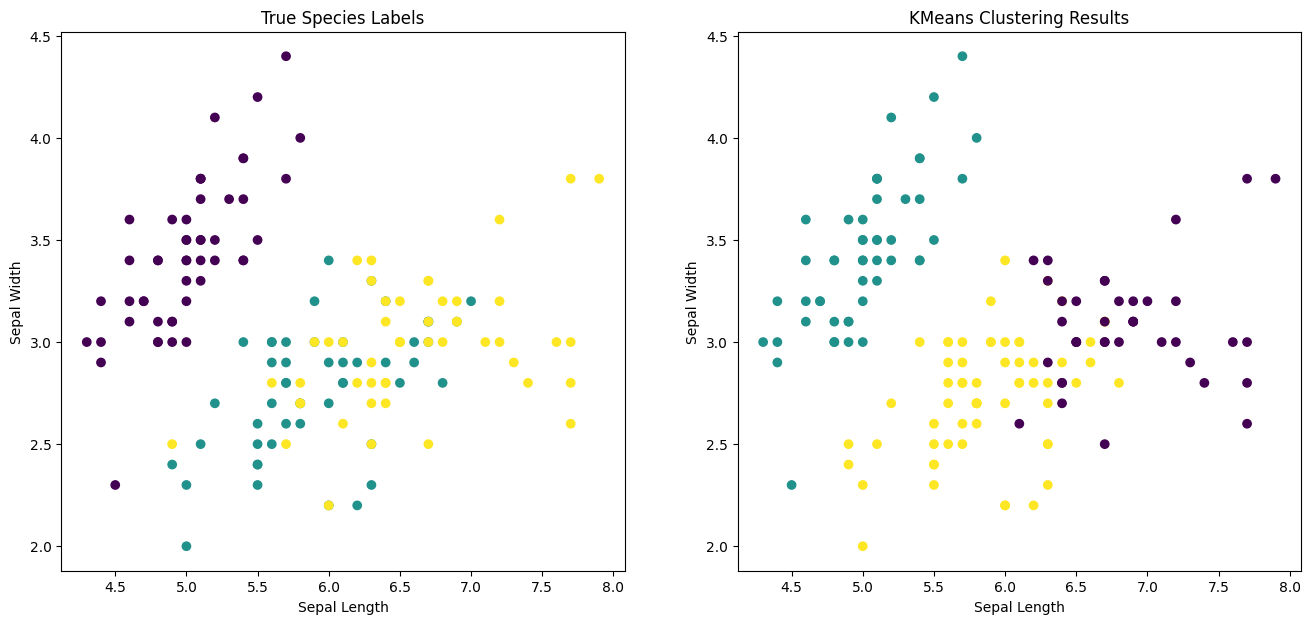

In [56]:
# Q7
from sklearn.cluster import KMeans
from scipy.stats import mode

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    # Assign the most common true label in that cluster
    labels[mask] = mode(iris.target[mask], keepdims=True)[0]
    
accuracy = accuracy_score(iris.target, labels)
print(f"KMeans Clustering Accuracy (after mapping): {accuracy:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: True Labels
axes[0].scatter(X[:, 0], X[:, 1], c=iris.target)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_title('True Species Labels')

# Plot 2: KMeans Cluster Labels
axes[1].scatter(X[:, 0], X[:, 1], c=clusters)
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_title('KMeans Clustering Results')

plt.show()

In [57]:
# Q8
zero_one_loss = np.mean(y_pred != y_test)
print(f"Manually Calculated 0-1 Loss: {zero_one_loss:.4f}")

manual_accuracy = np.mean(y_pred == y_test)
print(f"Manually Calculated Accuracy: {manual_accuracy:.4f}")

print(f"Sum of Loss and Accuracy: {zero_one_loss + manual_accuracy}")

sklearn_accuracy = accuracy_score(y_test, y_pred)
print(f"Scikit-learn Accuracy Score: {sklearn_accuracy:.4f}")

Manually Calculated 0-1 Loss: 0.0000
Manually Calculated Accuracy: 1.0000
Sum of Loss and Accuracy: 1.0
Scikit-learn Accuracy Score: 1.0000


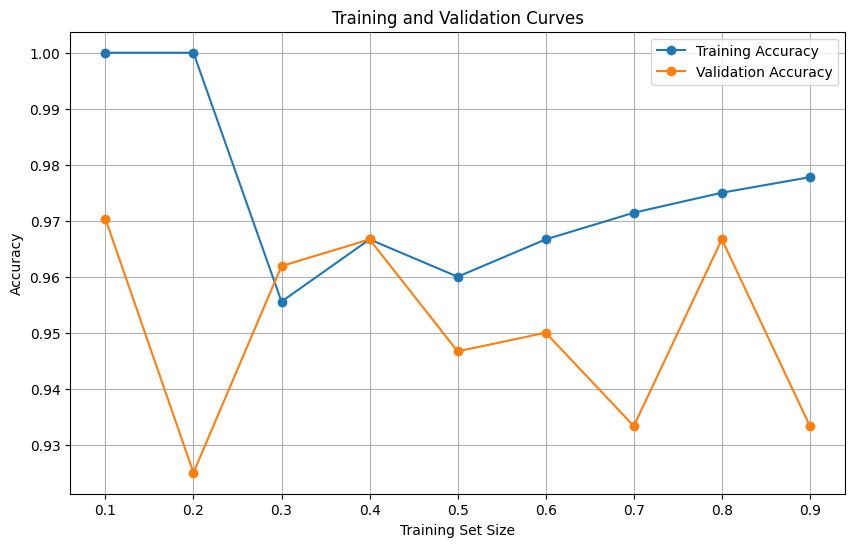

In [59]:
# Q9
train_sizes = np.linspace(0.1, 0.9, 9)
train_scores = []
test_scores = []

for size in train_sizes:
    X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
        X, y, train_size=size, random_state=42, stratify=y
    )

    model = LogisticRegression(max_iter=200)
    model.fit(X_train_v, y_train_v)

    train_scores.append(model.score(X_train_v, y_train_v))
    test_scores.append(model.score(X_test_v, y_test_v))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_scores, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Training and Validation Curves')
plt.legend()
plt.grid()
plt.show()

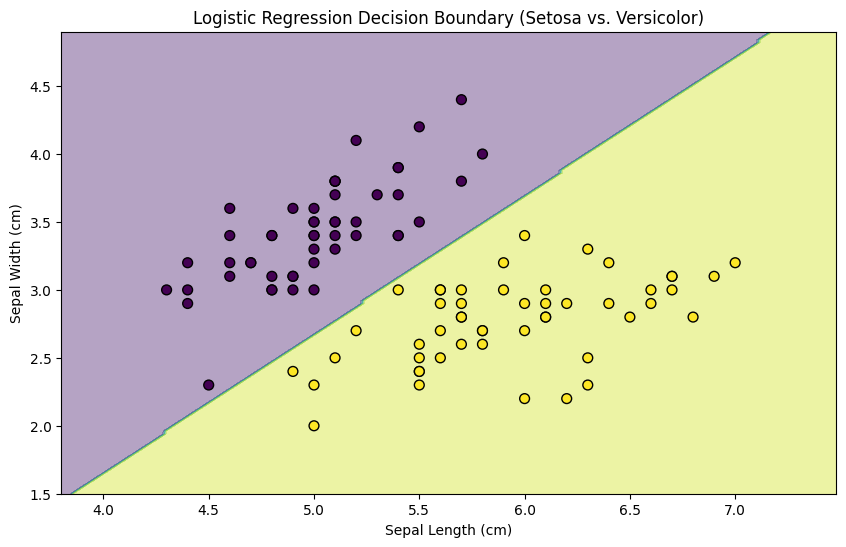

In [60]:
# Q10
X_vis = X[y < 2, :2]
y_vis = y[y < 2]

model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis') # Plot boundary [cite: 83]
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=50, edgecolor='k', cmap='viridis') # Plot data points [cite: 83, 84]

plt.title('Logistic Regression Decision Boundary (Setosa vs. Versicolor)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()